In [6]:
import torch
import os
import numpy as np
import scipy.misc as m
from torch.utils import data
from torch.utils.data import DataLoader
import torch.nn as nn
import sklearn.metrics as skm
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt  
import torch.nn.functional as F
import time
import cv2


In [12]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [62]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

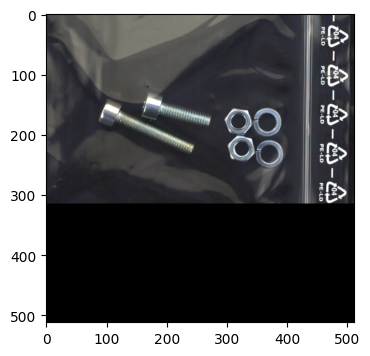

In [87]:
image = cv2.imread('342.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4,4))
plt.imshow(image)
plt.axis('on')
plt.show()

In [54]:
image=np.array(image,dtype="float32")
# image = torch.from_numpy(image.astype(np.float32)).to(mps_device)


In [46]:
# image.shape
# sam.to(torch.float)


In [55]:
# image
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor,SamAutomaticMaskGenerator


sam_checkpoint = "../sam_vit_l_0b3195.pth"
model_type = "vit_l"


sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
# sam.to(device=mps_device,torch.float)

mask_generator = SamAutomaticMaskGenerator(sam)



In [56]:
masks = mask_generator.generate(image)


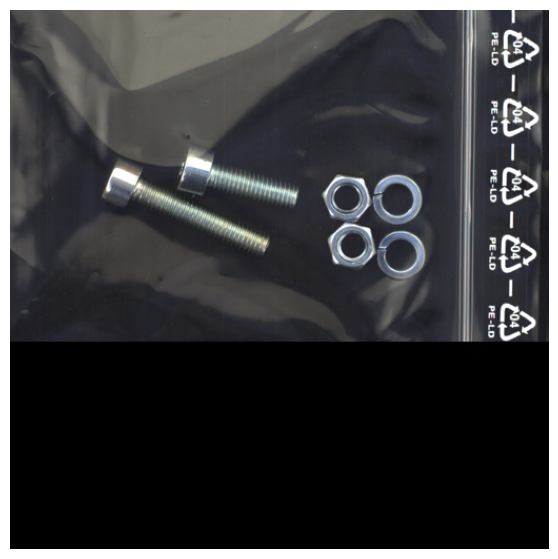

In [96]:
# masks[0]
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))


    
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.1]])
        img[m] = color_mask
    print(color_mask)
    ax.imshow(img)


plt.figure(figsize=(7,7))
plt.imshow(image)
# show_anns(masks)
plt.axis('off')
plt.show()

In [82]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=12,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=5000,  # Requires open-cv to run post-processing
)

In [81]:
masks2 = mask_generator_2.generate(image)


In [98]:
# len(masks2)
masks3 = sam(image,False)



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

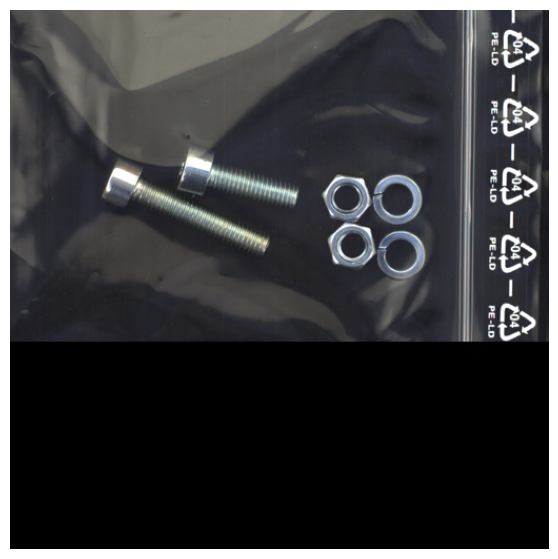

In [95]:
# masks[0]
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))


    
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.2]])
        img[m] = color_mask
    print(color_mask)
    ax.imshow(img)


plt.figure(figsize=(7,7))
plt.imshow(image)
# show_anns(masks)
plt.axis('off')
plt.show()

In [101]:
masks[0]

KeyError: 'logits'